In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
# DATA VISUALIZATION
# ------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style("darkgrid")
sns.color_palette("mako", as_cmap=True)
import plotly.express as px


In [3]:
df = pd.read_csv('Dataset/WFC Daily1.csv')
last_day = pd.DataFrame(df.iloc[-1 :])
last_day['Date'] = pd.to_datetime(last_day['Date']) + pd.Timedelta(days=1)
df = pd.concat([df, last_day], axis = 0)
df.reset_index(drop = True, inplace = True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5750,2022-11-08,47.250000,47.470001,46.720001,47.180000,47.180000,14842700
5751,2022-11-09,46.799999,47.000000,45.950001,45.970001,45.970001,18318700
5752,2022-11-10,47.020000,48.110001,46.930000,47.950001,47.950001,23091900
5753,2022-11-11,48.099998,48.360001,47.330002,47.549999,47.549999,18060100
5754,2022-11-12 00:00:00,48.099998,48.360001,47.330002,47.549999,47.549999,18060100


[]

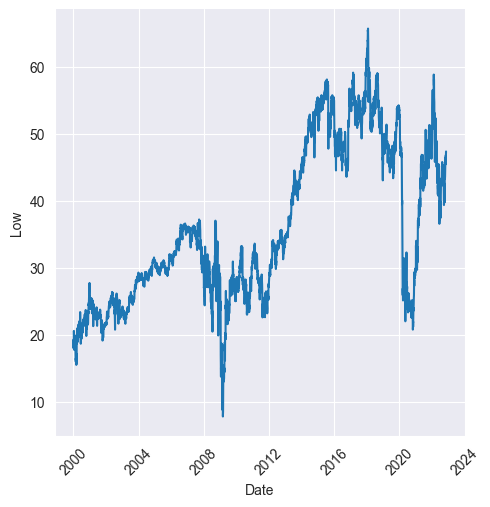

In [4]:
df_close = pd.DataFrame(df['Low'])
df_close.index = pd.to_datetime(df['Date'])
df_close.head()

sns.relplot(x='Date',y='Low', kind='line',data=df_close)
plt.xticks(rotation=45)
plt.plot()

In [5]:
# !pip install statsmodels==0.12.1

In [6]:
import statsmodels

In [7]:
statsmodels.__version__

'0.13.2'

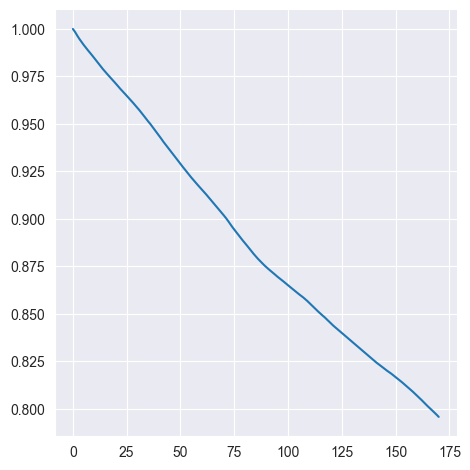

In [8]:
from statsmodels.tsa import stattools
acf,_,_,_ = stattools.acf(df_close,adjusted=True,nlags=170,qstat=True,fft=True,alpha = 0.05)
#acf is a numpy ndarray
sns.set_style("darkgrid")
sns.relplot(pd.Series(acf), kind='line')

(150.0, 170.0, 0.775, 0.825)

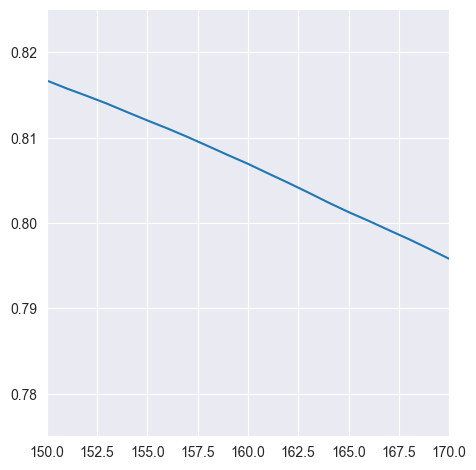

In [10]:
sns.relplot(pd.Series(acf), kind='line')
plt.axis([150, 170, 0.775, 0.825])

(165.0, 167.5, 0.775, 0.825)

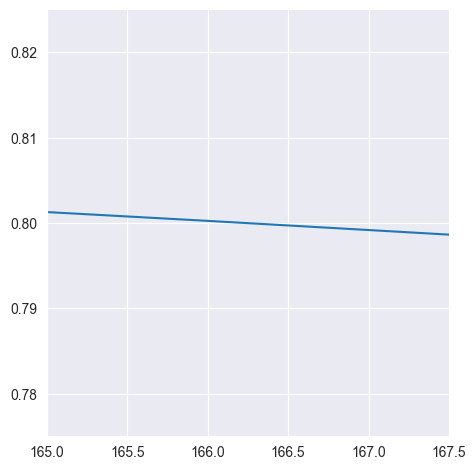

In [11]:
sns.relplot(pd.Series(acf), kind='line')
plt.axis([165, 167.5, 0.775, 0.825])